In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## read in data

In [2]:
raw = pd.read_csv('../dat/adult.data', header=None, 
                  names=['age', 'workclass', 'fnlwgt', 'education',
                        'education-num', 'marital', 'occupation', 'relationship', 'race',
                        'sex', 'capital-gain', 'capital-loss', 'hours/week', 'native-country', '>50k $/yr'])
raw.head()

,age,workclass,fnlwgt,education,education-num,marital,occupation,relationship,race,sex,capital-gain,capital-loss,hours/week,native-country,>50k $/yr
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
raw.shape

(32561, 15)

## column based scrubbing

In [4]:
train = raw.drop('fnlwgt', axis=1)
train.head()

,age,workclass,education,education-num,marital,occupation,relationship,race,sex,capital-gain,capital-loss,hours/week,native-country,>50k $/yr
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
train['education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [6]:
ed_dict = {
    ' Bachelors':14,
    ' HS-grad':9,
    ' 11th':7,
    ' Masters':15,
    ' 9th':5,
    ' Some-college':11,
    ' Assoc-acdm':13,
    ' Assoc-voc':12,
    ' 7th-8th':4,
    ' Doctorate':16,
    ' Prof-school':10,
    ' 5th-6th':3,
    ' 10th':6,
    ' 1st-4th':2,
    ' Preschool':1,
    ' 12th':8
}

In [7]:
train['education'].replace(to_replace=list(ed_dict.keys()), value=list(ed_dict.values()), inplace=True)

In [8]:
train.head()

,age,workclass,education,education-num,marital,occupation,relationship,race,sex,capital-gain,capital-loss,hours/week,native-country,>50k $/yr
0,39,State-gov,14,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,14,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,9,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,7,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,14,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


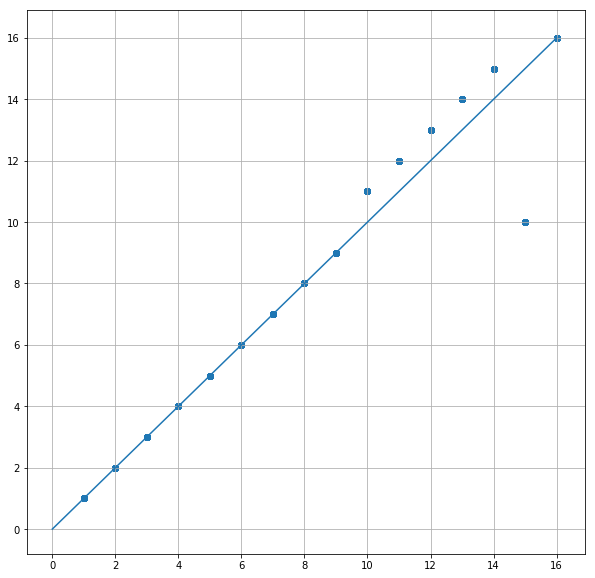

In [9]:
plt.figure(figsize=(10,10))
plt.plot(range(17))
plt.scatter(train['education-num'], train['education'])
plt.grid()
plt.show()

So a few of my education encodings don't match the originals. Why?

In [10]:
raw[train['education-num'] == 15].head()

,age,workclass,fnlwgt,education,education-num,marital,occupation,relationship,race,sex,capital-gain,capital-loss,hours/week,native-country,>50k $/yr
52,47,Private,51835,Prof-school,15,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,1902,60,Honduras,>50K
111,38,Private,65324,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,>50K
234,28,Private,76714,Prof-school,15,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,55,United-States,>50K
250,41,Private,112763,Prof-school,15,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,40,United-States,>50K
286,41,Private,220531,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,United-States,>50K


In [11]:
raw[train['education-num'] == 12].head()

,age,workclass,fnlwgt,education,education-num,marital,occupation,relationship,race,sex,capital-gain,capital-loss,hours/week,native-country,>50k $/yr
13,32,Private,205019,Assoc-acdm,12,Never-married,Sales,Not-in-family,Black,Male,0,0,50,United-States,<=50K
30,23,Local-gov,190709,Assoc-acdm,12,Never-married,Protective-serv,Not-in-family,White,Male,0,0,52,United-States,<=50K
39,48,Self-emp-not-inc,265477,Assoc-acdm,12,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,<=50K
76,40,Private,32214,Assoc-acdm,12,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,<=50K
98,48,Private,171095,Assoc-acdm,12,Divorced,Exec-managerial,Unmarried,White,Female,0,0,40,England,<=50K


Okay so it's just a pedagogical difference. We'll keep my encodings, then.

In [12]:
train.drop('education-num', axis=1, inplace=True)
train.head()

,age,workclass,education,marital,occupation,relationship,race,sex,capital-gain,capital-loss,hours/week,native-country,>50k $/yr
0,39,State-gov,14,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,14,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [13]:
train['relationship'].unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [14]:
train['sex'].unique()

array([' Male', ' Female'], dtype=object)

In [15]:
temp = train[train['capital-gain'] != 0]
temp.shape

(2712, 13)

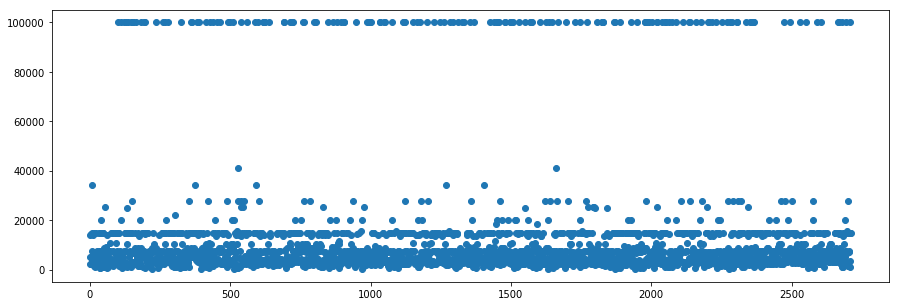

In [16]:
plt.figure(figsize=(15,5))
plt.scatter(range(temp.shape[0]), temp['capital-gain'])
plt.show()

In [17]:
temp = train[train['capital-loss'] != 0]
temp.shape

(1519, 13)

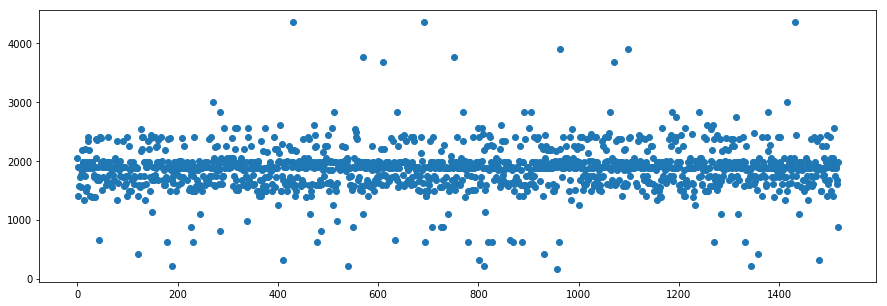

In [18]:
plt.figure(figsize=(15,5))
plt.scatter(range(temp.shape[0]), temp['capital-loss'])
plt.show()

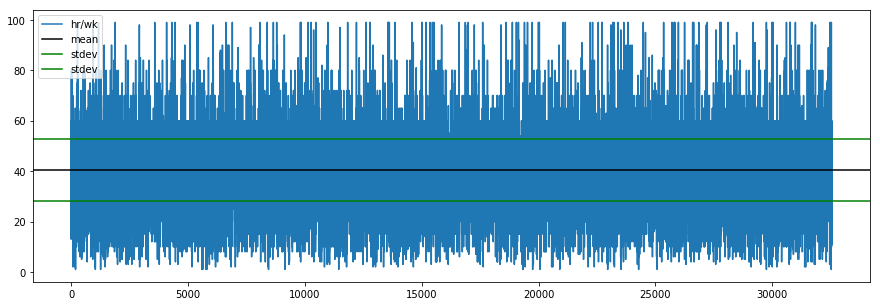

In [19]:
plt.figure(figsize=(15,5))
plt.plot(train['hours/week'], label='hr/wk')
plt.axhline(y=train['hours/week'].mean(), color = 'k', label='mean')
plt.axhline(y=train['hours/week'].mean()-train['hours/week'].std(), color = 'g', label='stdev')
plt.axhline(y=train['hours/week'].mean()+train['hours/week'].std(), color = 'g', label='stdev')
plt.legend()
plt.show()

In [20]:
train['>50k $/yr'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [21]:
train['>50k $/yr'].replace(to_replace=[' <=50K', ' >50K'], value=[0,1], inplace=True)
train.head()

,age,workclass,education,marital,occupation,relationship,race,sex,capital-gain,capital-loss,hours/week,native-country,>50k $/yr
0,39,State-gov,14,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,14,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


## NaN imputation
The nans in this data are encoded as question marks.

In [22]:
print('workclass\n', train['workclass'].unique())
print('occupation\n', train['occupation'].unique())
print('native-country\n', train['native-country'].unique())

workclass
 [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
occupation
 [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']
native-country
 [' United-States' ' Cuba' ' Jamaica' ' India' ' ?' ' Mexico' ' South'
 ' Puerto-Rico' ' Honduras' ' England' ' Canada' ' Germany' ' Iran'
 ' Philippines' ' Italy' ' Poland' ' Columbia' ' Cambodia' ' Thailand'
 ' Ecuador' ' Laos' ' Taiwan' ' Haiti' ' Portugal' ' Dominican-Republic'
 ' El-Salvador' ' France' ' Guatemala' ' China' ' Japan' ' Yugoslavia'
 ' Peru' ' Outlying-US(Guam-USVI-etc)' ' Scotland' ' Trinadad&Tobago'
 ' Greece' ' Nicaragua' ' Vietnam' ' Hong' ' Ireland' ' Hungary'
 ' Holand-Netherlands']


In [23]:
print('workclass has ', 100*train[train['workclass'] == ' ?'].shape[0]/train.shape[0], '% NaNs')
print('occupation has ', 100*train[train['occupation'] == ' ?'].shape[0]/train.shape[0], '% NaNs')
print('native-country has ', 100*train[train['native-country'] == ' ?'].shape[0]/train.shape[0], '% NaNs')

workclass has  5.638647461687294 % NaNs
occupation has  5.660145572924664 % NaNs
native-country has  1.7904855501980896 % NaNs


In [24]:
count = 0
ids = []
for i in range(train.shape[0]):
    if (train['workclass'].iloc[i] != ' ?') and (train['occupation'].iloc[i] != ' ?') and (train['native-country'].iloc[i] != ' ?'):
        pass
    else:
        count += 1
        ids.append(i)
print(100 * count/train.shape[0], '% of samples contain NaNs')

7.36770983692147 % of samples contain NaNs


Since there are only a few thousand samples with NaNs I'll just delete 'em. It'd be too much work to build a class based imputer for this experiment.

In [25]:
train.drop(labels=ids, axis=0, inplace=True)

In [26]:
train.shape

(30162, 13)

## are women disproportionately labeled 0?

In [27]:
print(100*train[train['>50k $/yr'] == 1].shape[0]/train.shape[0], '% of people are labeled 1')

24.892248524633644 % of people are labeled 1


In [28]:
print('percentage female:', 100 * train[train['sex'] == ' Female'].shape[0] / train.shape[0])
print('percentage male:', 100 * train[train['sex'] == ' Male'].shape[0] / train.shape[0])

percentage female: 32.431536370267224
percentage male: 67.56846362973278


In [29]:
print(100*train[(train['sex'] == ' Male') & (train['>50k $/yr'] == 1)].shape[0]/train[train['sex'] == ' Male'].shape[0], '% of males are labeled 1')
print(100*train[(train['sex'] == ' Female') & (train['>50k $/yr'] == 1)].shape[0]/train[train['sex'] == ' Female'].shape[0], '% of females are labeled 1')

31.38370951913641 % of males are labeled 1
11.367818442036393 % of females are labeled 1


Yes. Compared to men, women are only getting labeled "1" a third as often.

## one-hot encoding

In [30]:
onehot = pd.get_dummies(train, columns=['workclass', 'marital', 'occupation',
                                       'relationship', 'race', 'sex', 'native-country'])
onehot.head()

,age,education,capital-gain,capital-loss,hours/week,>50k $/yr,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,14,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,14,0,0,13,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,9,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,53,7,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,28,14,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


## write out

For visualization, let's first write out a dataset without one-hots:

In [31]:
train.to_csv('../dat/clean_categorical.data', index=False)

and then the one-hot version

In [32]:
onehot.to_csv('../dat/clean.data', index=False)